# Response for Single Initial Nuclide Workbook

This Jupyter Notebook is designed to enable comparisons for the neutron activation response of single nuclide analyzed by an ALARA run across datasets. The purpose of this notebook is for the validation of ALARAJOY-processed data from the FENDL3.2x data sets.

**Import Packages**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import single_nuc as sn
import importlib

**User Definitions**

Establish constants to be used throughout the notebook, including the target parent nuclide, ...

In [19]:
# Parent Nuclide Attributes
parent_element = 'Fe'
parent_A = 56

# CSV save location
csv_dir = '/filespace/e/esweinstein2/research/ALARA/tools'
gen_csv = csv_dir + '/{datalib}_{variable}_{unit}_-_Interval_#1_Zone_inner_zone1_.csv'

**Load in CSV Data to Pandas DataFrames**

In [4]:
importlib.reload(sn)

datalibs = ['fendl2', 'fendl3']
variables = [
    'Number_Density', 'Specific_Activity',
    'Total_Decay_Heat', 'Contact_Dose'
    ]
units = ['atoms_kg', 'Bq_kg', 'W_kg', 'Sv_hr_._data_ANS6_4_3']

dfs = sn.process_metadata(gen_csv)

times = list(dfs['fendl3_Specific_Activity']['Data'].columns[1:])

# Example DataFrame
dfs['fendl3_Specific_Activity']['Data']

,isotope,shutdown,1e-05 y,0.01 y,1 y,100 y,10000 y
0,sc-48,3.159000e+08,3.154600e+08,7.894900e+07,0.000000e+00,0.000000e+00,0.000000e+00
1,ti-51,1.298600e+09,6.941100e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,v-49,1.160900e+07,1.160900e+07,1.152000e+07,5.404400e+06,7.258100e-27,0.000000e+00
3,v-50,9.555800e-08,9.555800e-08,9.555800e-08,9.555800e-08,9.555800e-08,9.555800e-08
4,v-52,1.994500e+10,7.559600e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,v-53,9.886100e+09,1.049600e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,v-54,1.036600e+09,1.301800e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,cr-51,4.497700e+12,4.497300e+12,4.106200e+12,4.989700e+08,0.000000e+00,0.000000e+00
8,cr-55,6.499400e+10,2.328900e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,mn-52,2.528000e+10,2.526900e+10,1.610000e+10,6.395300e-10,0.000000e+00,0.000000e+00


**Plot Data for a Single Data Source**

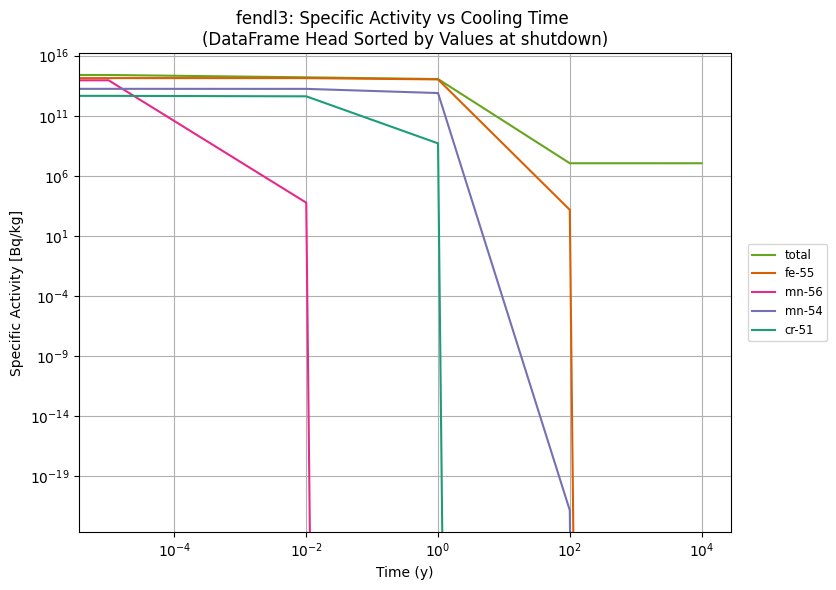

In [20]:
importlib.reload(sn)
sn.plot_single_nuc(
    dfs['fendl3_Specific_Activity'],
    total=True,
    head=5,
    seconds=False
)

**Comparatively Plot Data for Two Data Sets**

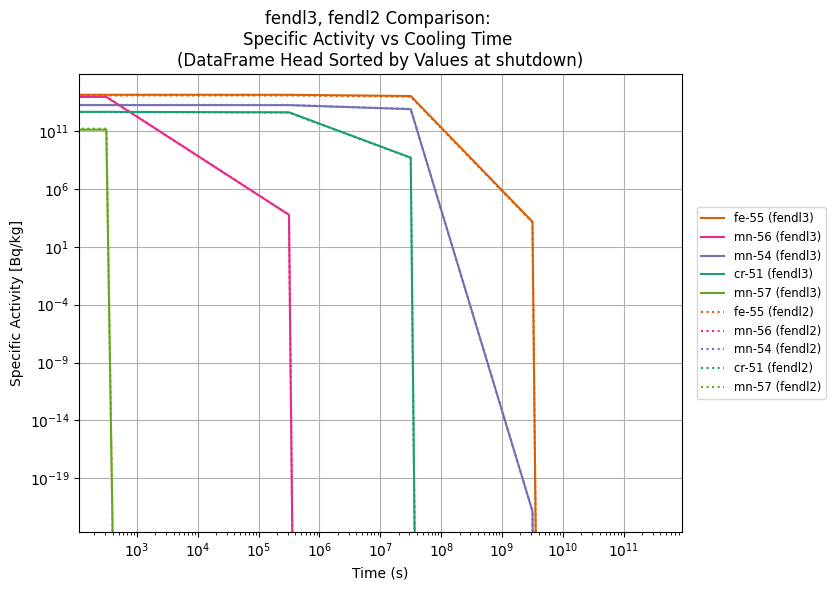

In [21]:
importlib.reload(sn)
sn.plot_single_nuc(
    [dfs['fendl3_Specific_Activity'], dfs['fendl2_Specific_Activity']],
    total=False, 
    element=None, 
    sort_by_time='shutdown',
    head=5
)

**Iteratively Compare Totals from Each Variable between the Data Sets**

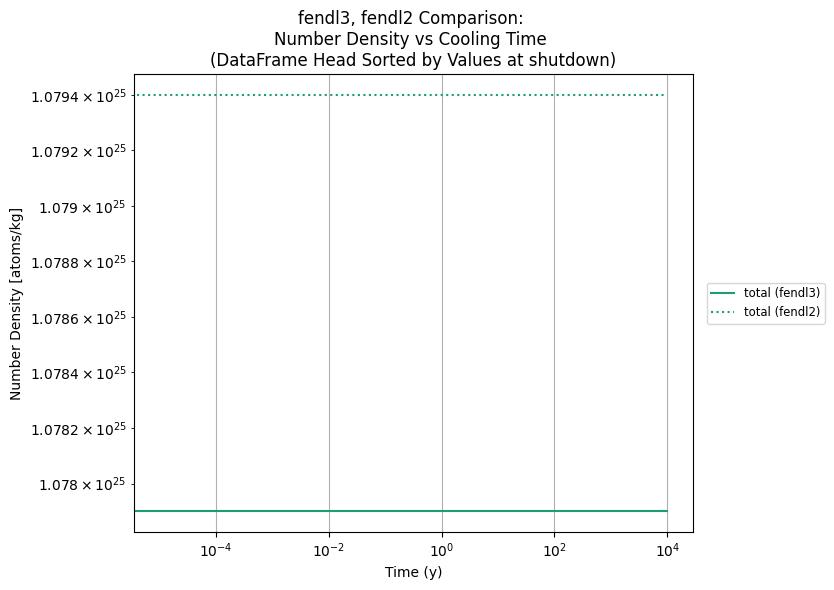

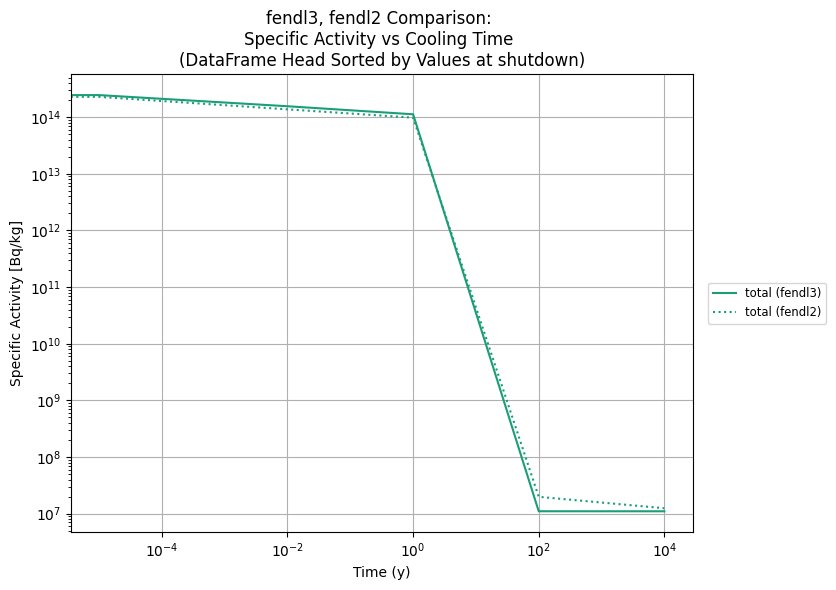

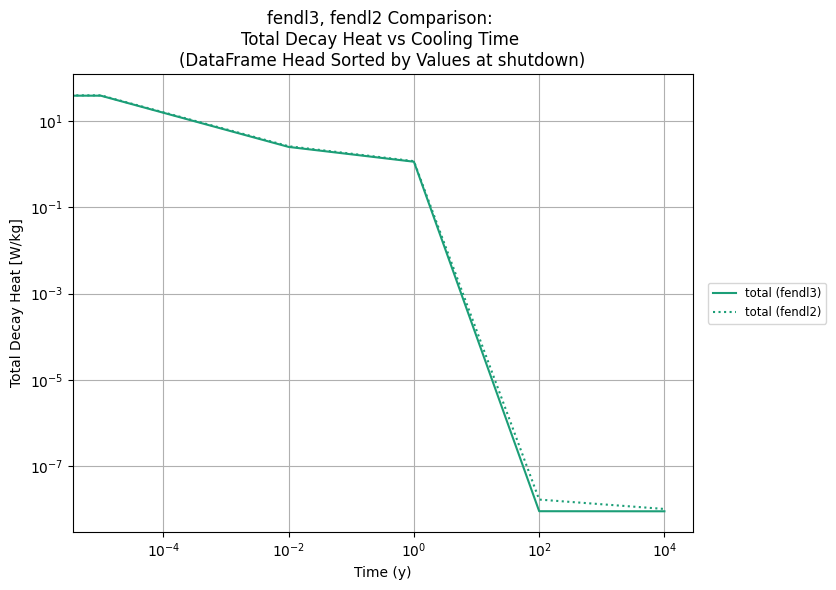

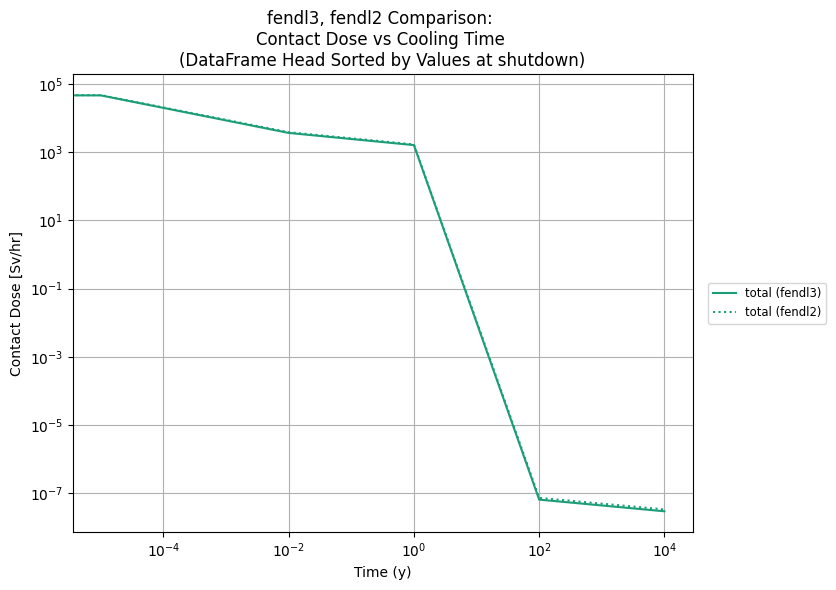

In [22]:
for variable in variables:
    sn.plot_single_nuc(
        [dfs[f'fendl3_{variable}'], dfs[f'fendl2_{variable}']],
        total=True,
        head=1,
        seconds=False
    )

**Plot Pie charts for each Data Set at each Cooling Time, Variable**

**Note**: We are seeing a complete lack of tritium tracking from ALARAJOY. At 100 years, fendl2 shows a 37.0% contribution of specific activity from tritium, whereas fendl3 (ALARAJOY) does not include any. While a close examination of the tabular data also shows a notable difference in the number of minor or short-lived isotopes, the lack of tritium in ALARAJOY-processed data appears to be the most significant and obvious processing error from ALARAJOY.

In [ ]:
importlib.reload(sn)
for datalib in datalibs:
    for variable in variables:
        for time in times:
            sn.single_data_source_pie(dfs[f'{datalib}_{variable}'], time)

**Extending Individual Pie Chart Data Over Time**

The plots below extend the pie charts from above to show the relative contributions of each variable over time.

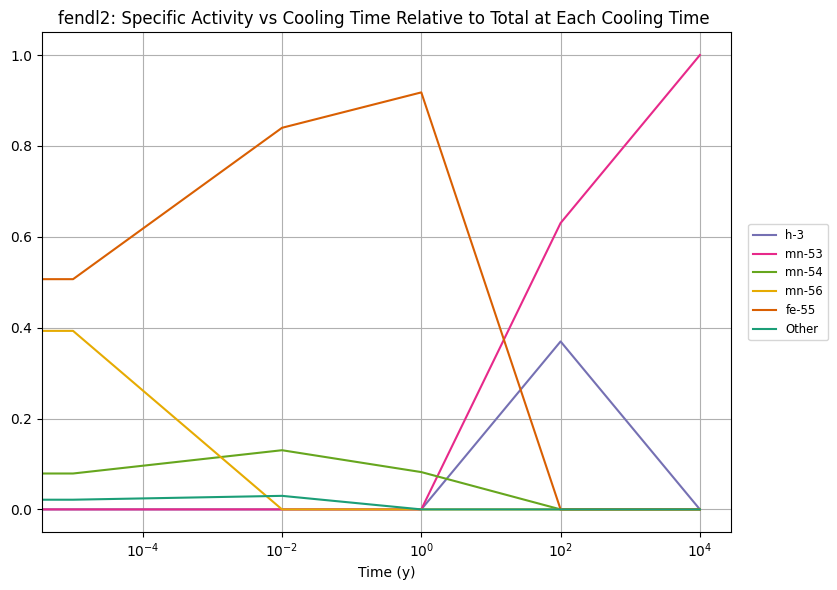

In [11]:
# Single Data Set
importlib.reload(sn)
df2 = sn.relative_contributions(dfs['fendl2_Specific_Activity']['Data'])
df2 = sn.process_metadata(
    existing_df=df2,
    inp_datalibs='fendl2',
    inp_variables='Specific_Activity'
    )
sn.plot_single_nuc(
    df2['fendl2_Specific_Activity'], 
    relative=True,
    filter_small=True,
    seconds=False)

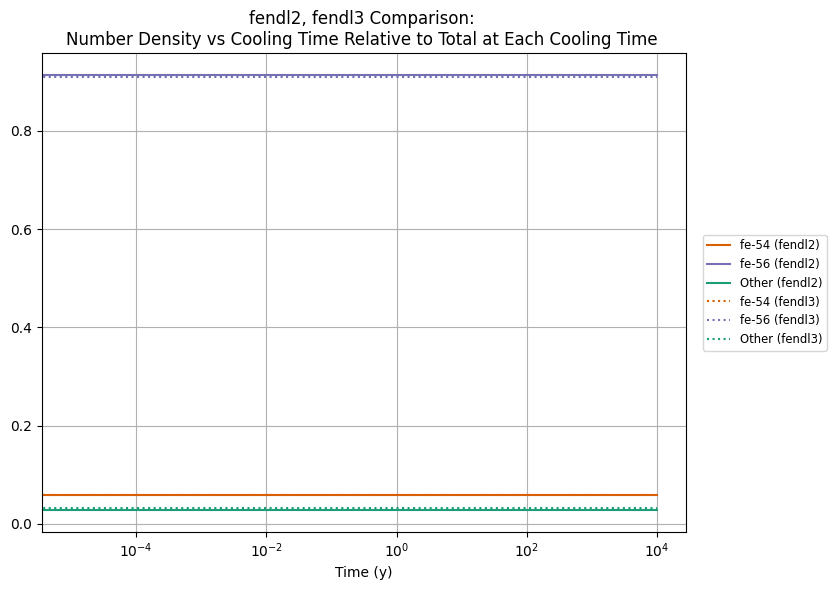

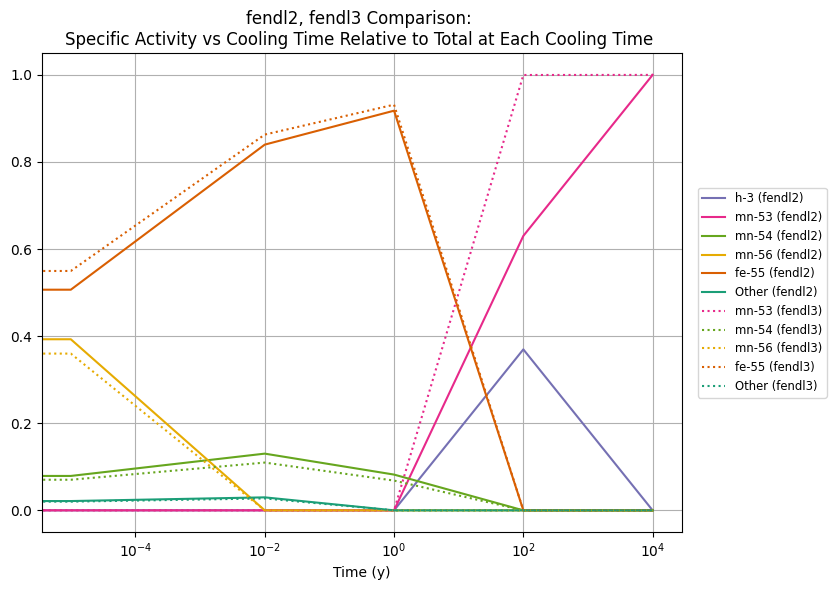

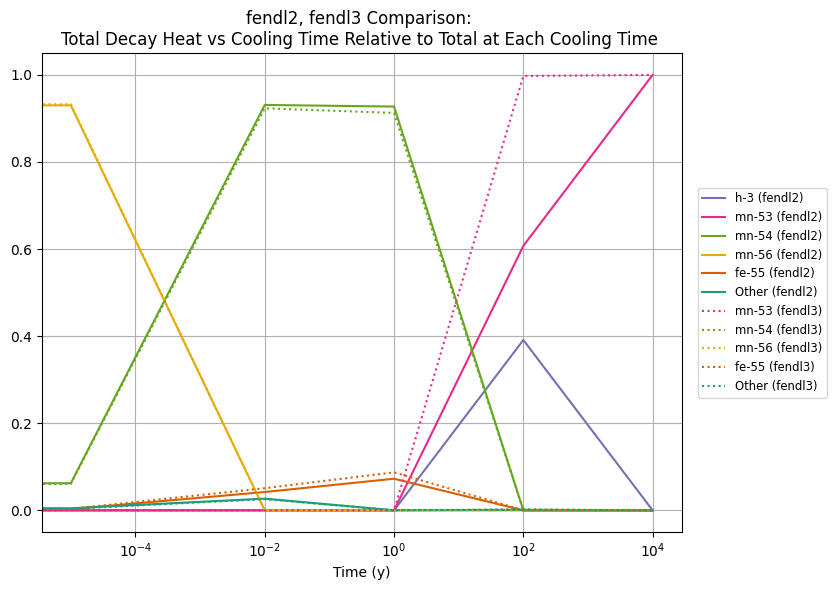

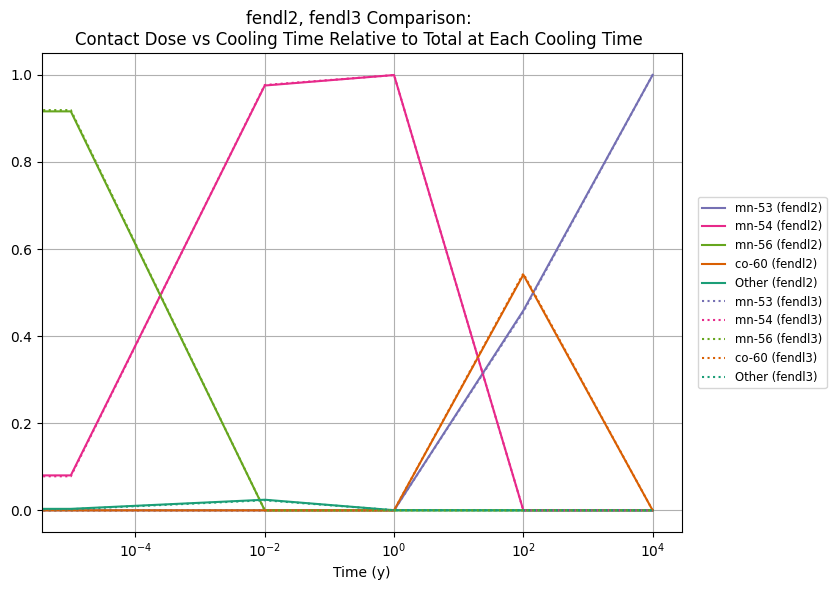

In [ ]:
importlib.reload(sn)
for variable in variables:
    rel_dfs = []
    for datalib in datalibs:
        rel_df =sn.relative_contributions(dfs[f'{datalib}_{variable}']['Data'])
        rel_df = sn.process_metadata(
            existing_df=rel_df,
            inp_datalibs=datalib,
            inp_variables=variable
            )
        rel_dfs.append(rel_df[f'{datalib}_{variable}'])
        
        
    sn.plot_single_nuc(
        rel_dfs,
        relative=True,
        filter_small=True,
        seconds=False,
        yscale='linear')

**Track Isotope and Cell-Level Differences between the DataFrames**

Create a new DataFrame comparing the difference isotopic contributions to the given ALARA output variable at each cooling time interval. Simultaneously, track which isotopes are represented only in one data set or the other to evaluate the significance of their absence to the other data set.

In [33]:
# Example using Specific_Activity
diff, unique_isotopes = sn.tabular_comp(dfs, 'Specific_Activity')
unique_isotopes = sn.maximum_contribution(
    dfs, 'Specific_Activity', unique_isotopes
    )

# Example isotopic data for tritium, only present in fendl2 data
unique_isotopes['fendl2']['h-3']

{'Absolute Specific_Activity': {'Maximum Contribution': 1988300000.0,
  'Time of Maximum Contribution': '1e-05 y'},
 'Relative': {'Maximum Contribution': 0.3696739075651429,
  'Time of Maximum Contribution': '100 y'}}

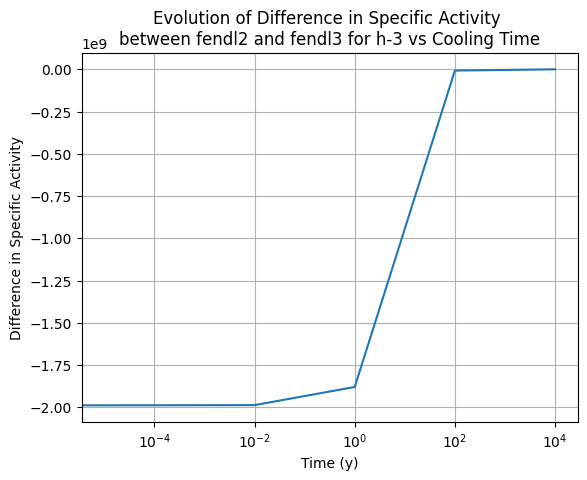

In [29]:
importlib.reload(sn)

sn.plot_isotope_diff(diff, 'h-3', 'Specific Activity', seconds=False)

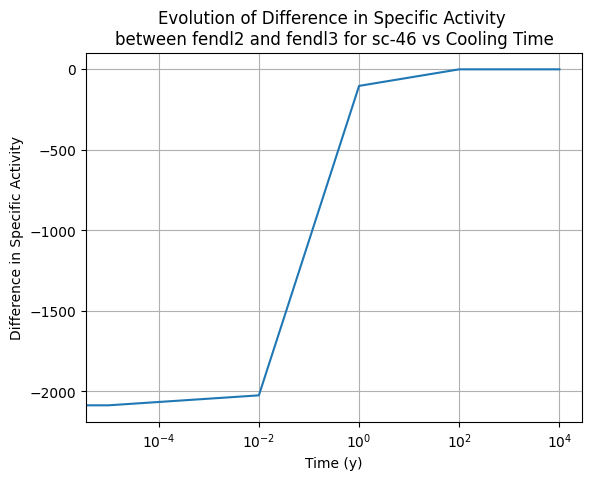

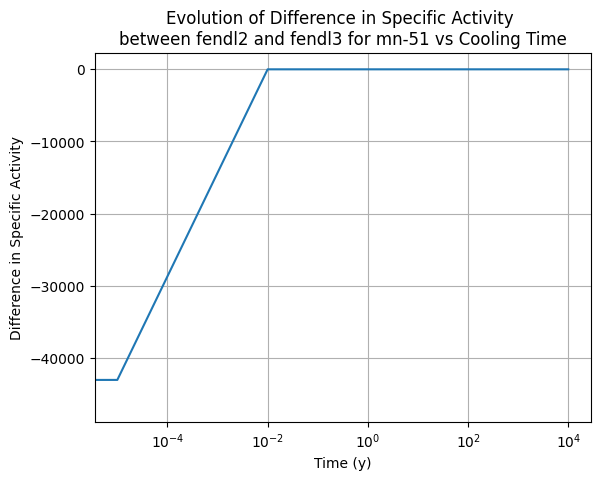

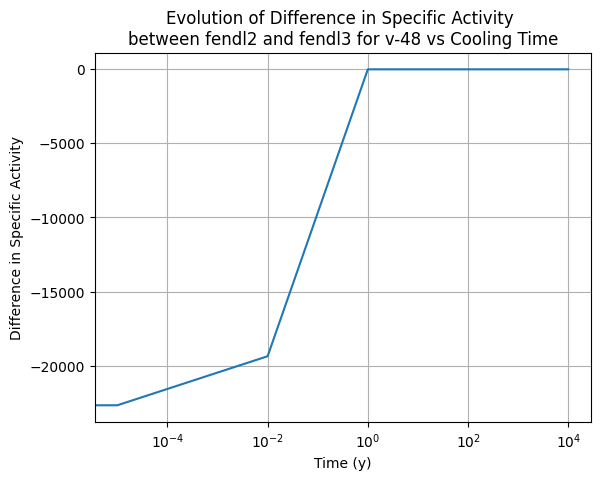

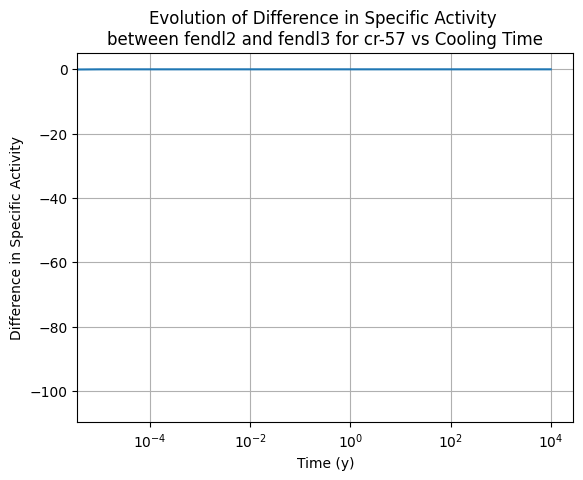

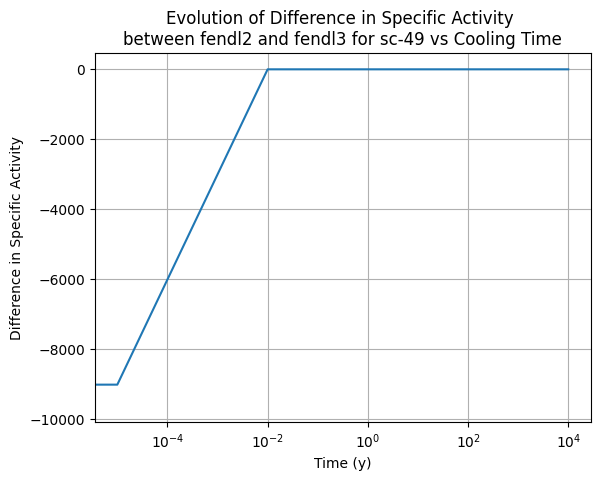

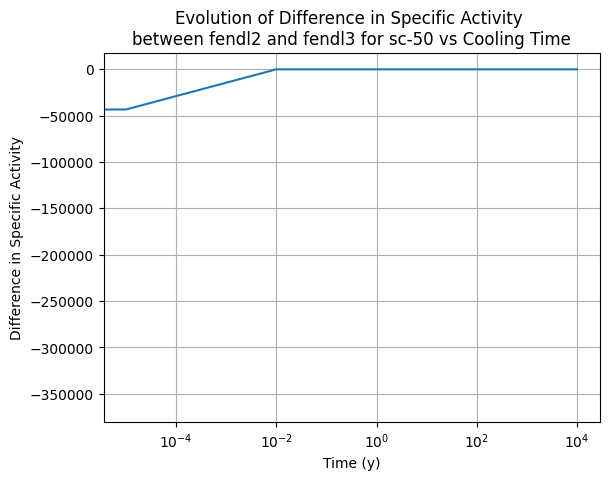

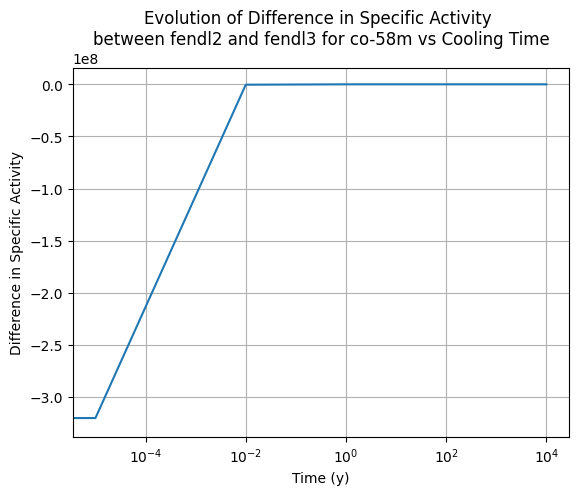

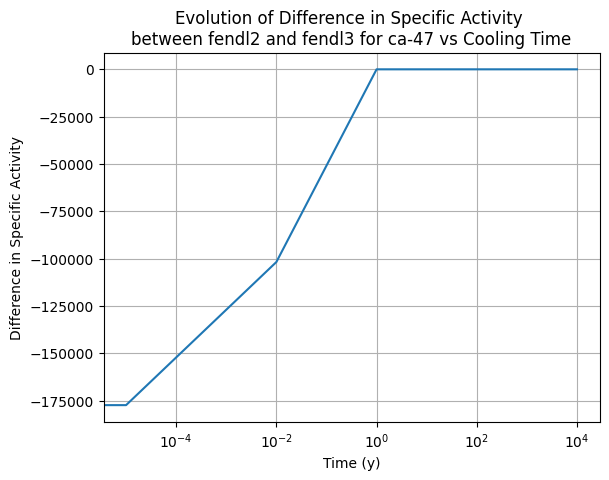

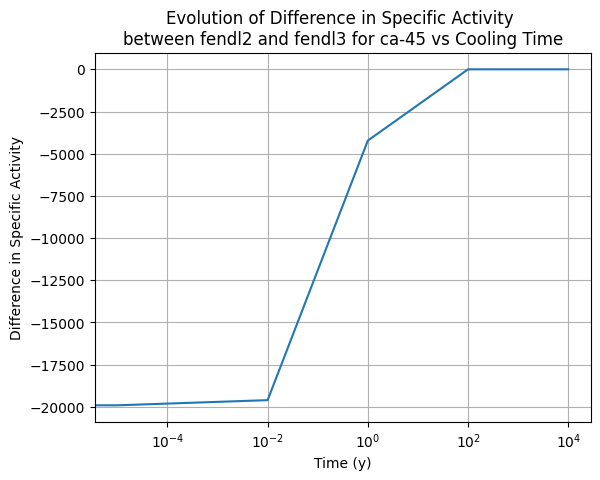

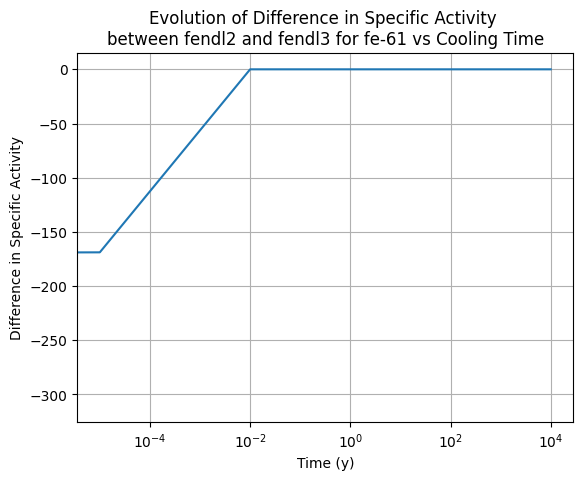

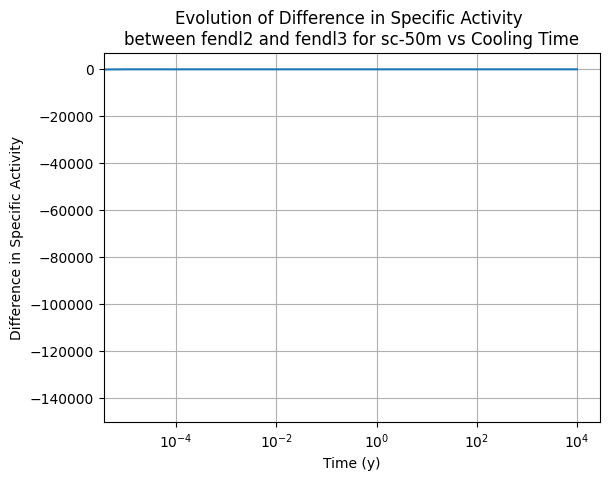

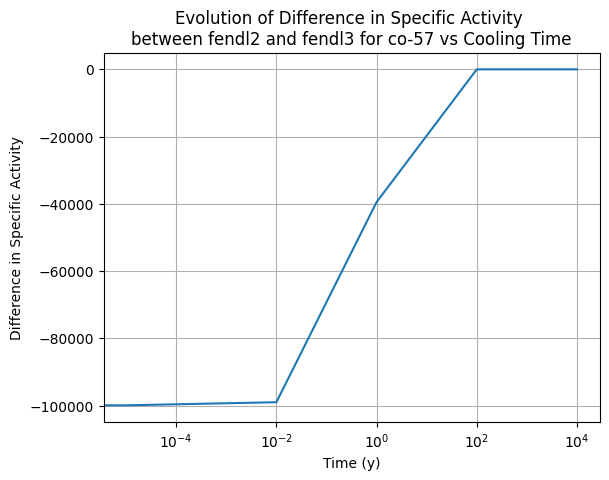

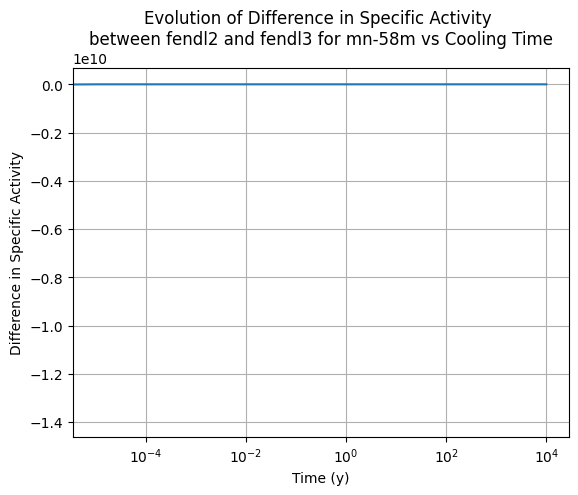

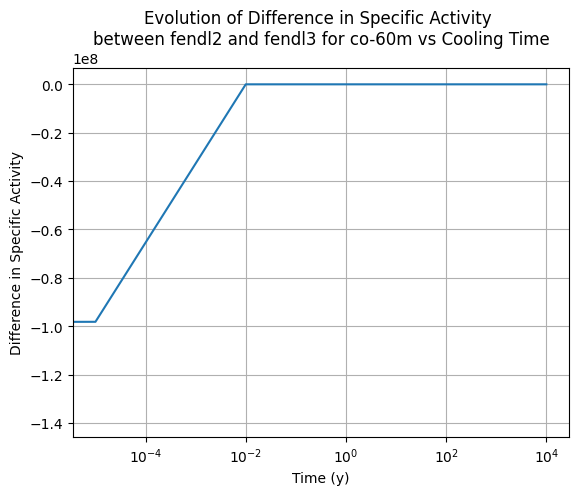

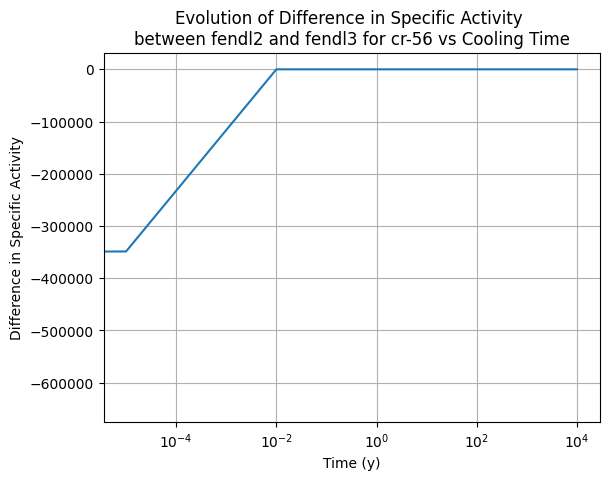

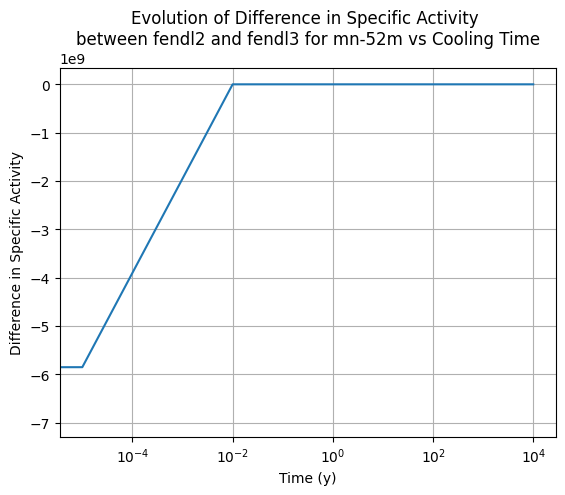

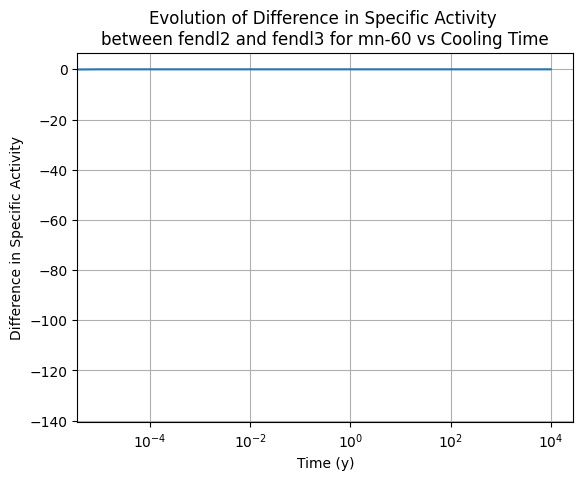

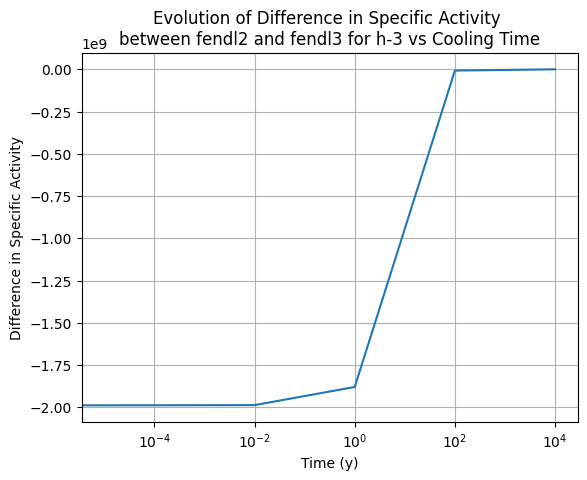

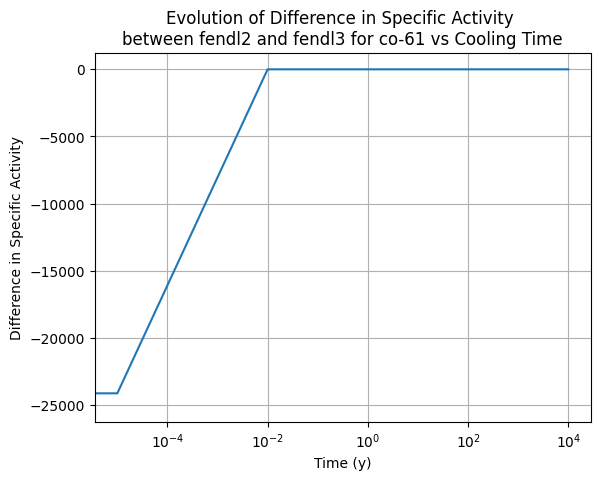

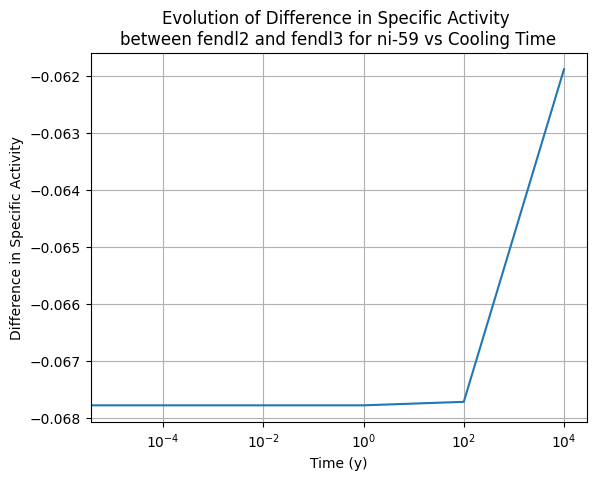

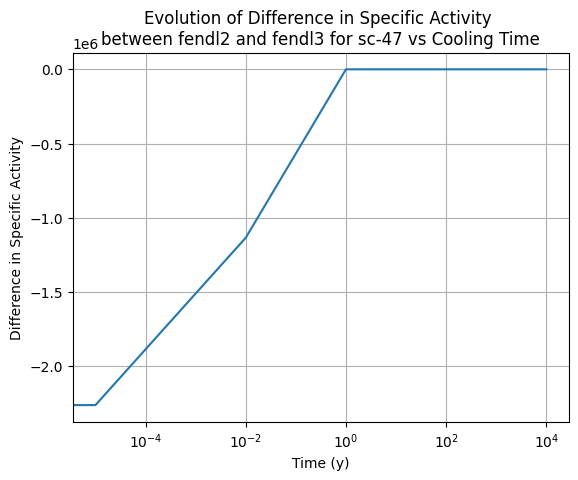

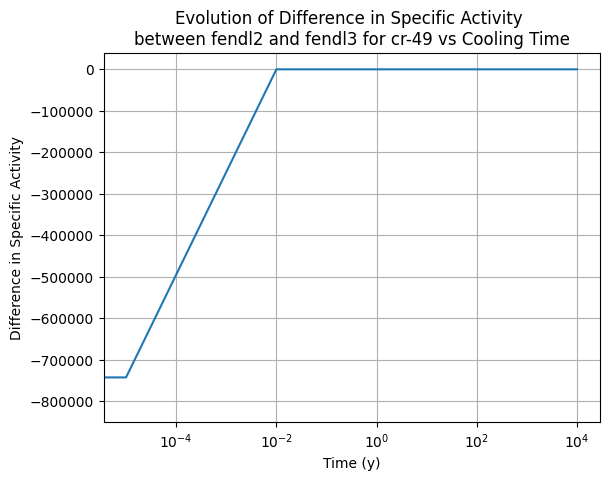

In [30]:
for isotope in unique_isotopes['fendl2'].keys():
    sn.plot_isotope_diff(diff, isotope, 'Specific Activity', seconds=False)